In [577]:
import requests
import pandas as pd
from matplotlib  import pyplot as plt
import warnings
import re
warnings.simplefilter("ignore", UserWarning)
import plotly.express as px
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
from IPython.core.display import HTML

In [15]:
 headers =
"x-rapidapi-host": "coronavirus-monitor.p.rapidapi.com",
"x-rapidapi-key": "f676954211msh7d3a926257fee49p186775jsn2da79c86aca2"
}
url = "https://coronavirus-monitor.p.rapidapi.com/coronavirus/cases_by_country.php"

In [244]:
data = requests.get(url,  headers=headers)

In [245]:
data =  data.json()

# DADOS COLETADOS 

In [425]:
data.get('statistic_taken_at')

'2020-03-22 20:44:06'

In [247]:
df = pd.DataFrame(data.get('countries_stat'))
df.head(10)

,active_cases,cases,country_name,deaths,new_cases,new_deaths,region,serious_critical,total_cases_per_1m_population,total_recovered
0,"5,353","81,054",China,"3,261",46,6,,"1,845",56,"72,440"
1,"46,638","59,138",Italy,"5,476","5,560",651,,"3,000",978,"7,024"
2,"31,764","32,356",USA,414,"8,149",112,,795,98,178
3,"24,722","28,603",Spain,"1,756","3,107",375,,"1,785",612,"2,125"
4,"24,492","24,852",Germany,94,"2,488",10,,2,297,266
5,"12,318","21,638",Iran,"1,685","1,028",129,,0,258,"7,635"
6,"13,144","16,018",France,674,"1,559",112,,"1,746",245,"2,200"
7,"5,884","8,897",S. Korea,104,98,2,,59,174,"2,909"
8,"7,245","7,474",Switzerland,98,611,18,,141,864,131
9,"5,309","5,683",UK,281,665,48,,20,84,93


In [248]:
df.dtypes

active_cases                     object
cases                            object
country_name                     object
deaths                           object
new_cases                        object
new_deaths                       object
region                           object
serious_critical                 object
total_cases_per_1m_population    object
total_recovered                  object
dtype: object

In [249]:
df = df.infer_objects()
df.dtypes

active_cases                     object
cases                            object
country_name                     object
deaths                           object
new_cases                        object
new_deaths                       object
region                           object
serious_critical                 object
total_cases_per_1m_population    object
total_recovered                  object
dtype: object

In [250]:
numeric_columns =  ["active_cases", "cases", "deaths", "new_cases", "new_deaths", "serious_critical", "total_cases_per_1m_population", "total_recovered"]

In [251]:
for column in numeric_columns:
    df[column] = df[column].apply(lambda x: x.replace(",", ""))
    df[column] =  df[[column]].astype(float)

In [252]:
df.dtypes

active_cases                     float64
cases                            float64
country_name                      object
deaths                           float64
new_cases                        float64
new_deaths                       float64
region                            object
serious_critical                 float64
total_cases_per_1m_population    float64
total_recovered                  float64
dtype: object

# Situação no mundo

In [570]:
df.style.background_gradient(cmap='Reds')

# Brasil em relação aos paises mais afetados

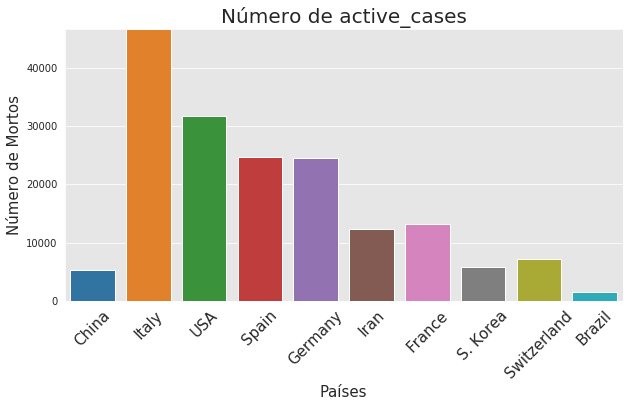

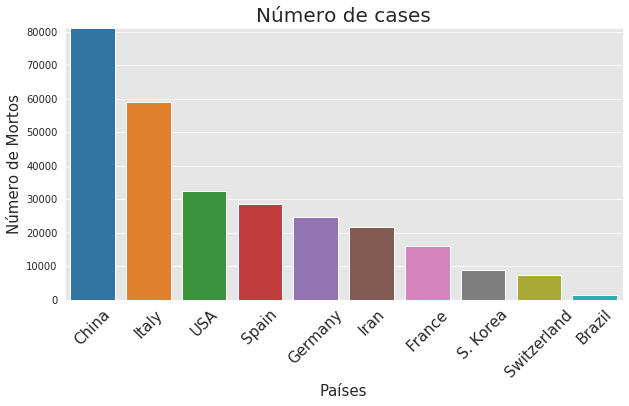

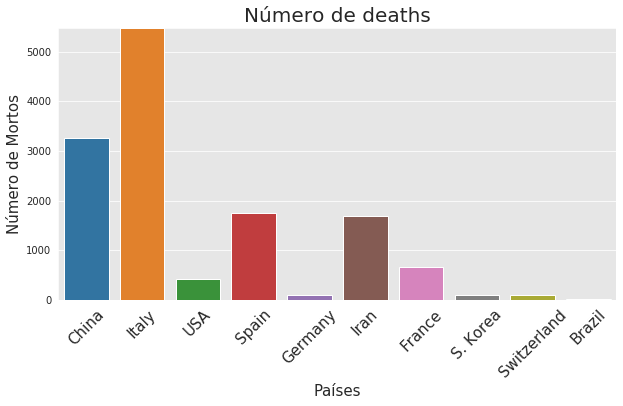

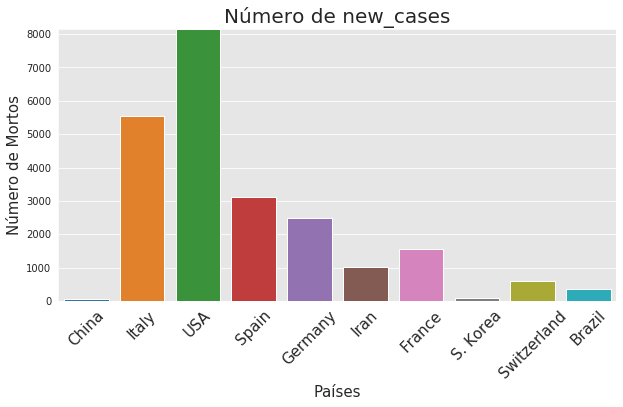

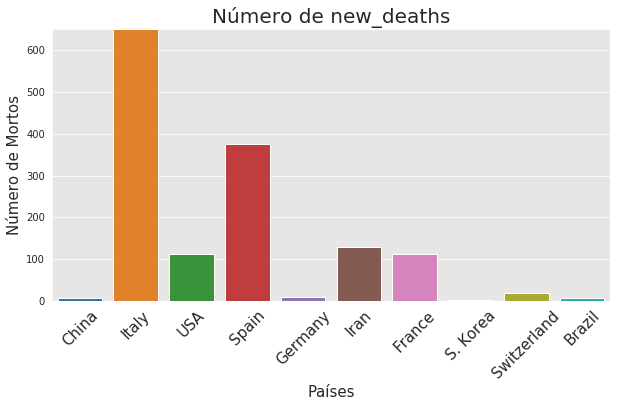

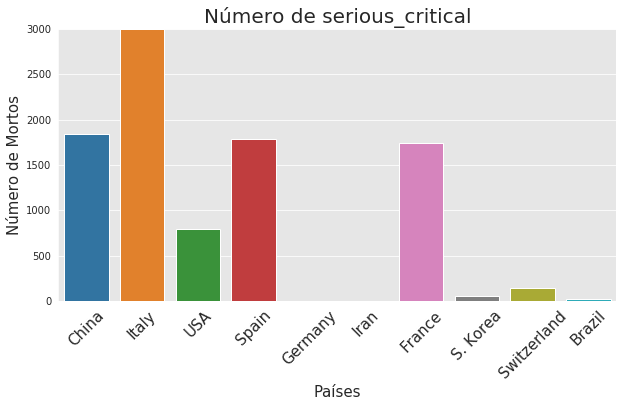

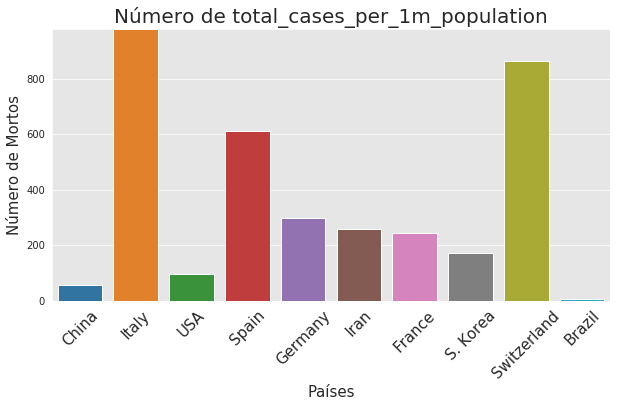

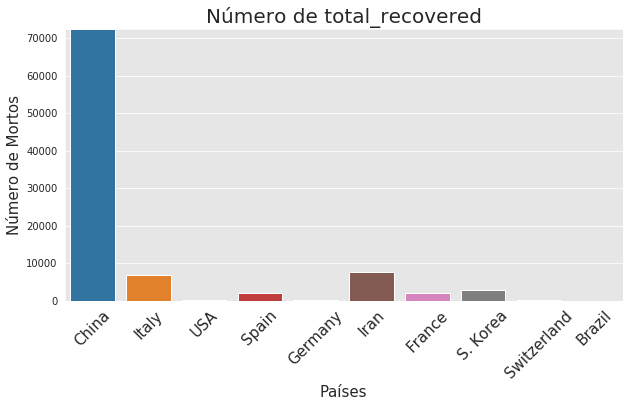

In [575]:
brasil = df[df['country_name'] == "Brazil"]
brasil.deaths.values[0] = 25

for column in columns_numeric:
    top = df.groupby(column).head(9)[:9]
    top = top_deathes.append(brasil)
    plt.figure(figsize=(10,5))
    plt.title("Número de {}".format(column), fontsize=20)
    sns.barplot(top['country_name'],top[column])
    plt.xlabel("Países", fontsize=15)
    plt.ylabel("Número de Mortos",fontsize=15 )
    plt.xticks(rotation=45,fontsize=15 )
    plt.ylim(0,max(top[column]), 10 );
    plt.show()

In [539]:
cidades = pd.read_csv("estados.csv",  names =['nome', 'qtd'], header=None )

In [568]:
cidades.head()

,nome,qtd
0,São Paulo,358
2,Rio de Janeiro,168
3,Brasília,126
4,Fortaleza,116
5,Porto Alegre,38


In [541]:
cidades['qtd'] = cidades['qtd'].apply(lambda x:  0 if len(re.findall(r'\d+', str(x))) == 0 else re.findall(r'\d+', str(x))[0] )

# Cidades brasileiras com maior número de casos

In [569]:
#cidades.head()
cidades.style.background_gradient(cmap='Reds')

,nome,qtd
0,São Paulo,358
2,Rio de Janeiro,168
3,Brasília,126
4,Fortaleza,116
5,Porto Alegre,38
6,Salvador,33
7,Curitiba,31
8,Recife,31
9,Belo Horizonte,30
10,Manaus,25


In [543]:
cidades = cidades.drop(1)

In [544]:
cidades['qtd'] = cidades[['qtd']].astype(int)
top_cidades = cidades.head(10)

In [576]:
fig = px.bar(top_cidades.sort_values('qtd', ascending=False).sort_values('qtd', ascending=True), 
             x="qtd", y="nome", 
             title='Total de casos', 
             text='qtd', 
             orientation='h', 
             width=1000, height=900, range_x = [0, max(top_cidades['qtd'])])
fig.update_traces(marker_color='#46cdcf', opacity=0.8, textposition='inside')

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

# Crescimento no mundo

In [578]:
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/1571387"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')